## 이항 분류
### 수집된 데이터를 표준화 기법으로 정규화하여 country2.csv를 사용한 경우
- 단위가 다른 데이터의 비중을 동일하게 표준화: x(데이터)-μ(평균)/σ(표준편차)

In [1]:
%autosave 0
import numpy as np
import matplotlib.pyplot as plt

import os
import time

import numpy as np
import tensorflow as tf
import seaborn as sb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장

Autosave disabled


In [8]:
# 데이터 준비
# 정확도 향상은 있으나 Overfit 발생
# data = np.loadtxt('./country1.csv', delimiter=',', dtype=np.float64)
# 정확도 향상, Overfit 발생 안됨
data = np.loadtxt('./country2.csv', delimiter=',', dtype=np.float64)
# print(type(data))
# print(data.shape)
# print(data)

In [9]:
# 평균, 표준 편차의 산출시 행방향 기준이 아니라 열방향을 기준으로 산출해야함.
# 성  명  Python Tensorflow
# 왕눈이  90     80
# 아로미  95     90
# 투투    80     65
# Python 과목의 평균과 표준편차는 열방향으로 구해야하나, 
# 일반적인 관측치 데이터는 행방향을 가지고 있음
print(data.shape) # (100, 7)
datat = data.T    # 열방향을 행방향으로 변경해야함, 전치 행렬.
# print(datat)
print(datat.shape)# (7, 100)
# print(datat[0])   # 음주 횟수
# print(datat[5])  
# print(datat[6])   # class, 분류, 표준화 필요 없음.

(100, 7)
(7, 100)


In [10]:
# 연속실행 안됨.
print(range(len(datat)))
print(range(len(datat)-1))

# print(datat)
ms = [] # 평균 목록, 테스트시 사용
stds = [] # 표준편차 목록, 테스트시 사용
for i in range(len(datat)-1): # 6개의 행 대상
    # datat[i] = datat[i].astype('float32')
    m = datat[i].mean()  # 평균
    std = datat[i].std() # 표준편차
    print(i, '행 ''m:', m, ' std:', std)
    
    # 표준화 실행, 평균(m) 0, 분산 1, 표준편차: std
    datat[i] = (datat[i] - m) / std 

    ms.append(m)     # 모델 사용시에 사용
    stds.append(std) # 모델 사용시에 사용

# print(datat[5]) 

range(0, 7)
range(0, 6)
0 행 m: 0.8  std: 1.0295630140987002
1 행 m: 0.39  std: 0.4877499359302879
2 행 m: 0.66  std: 0.4737087712930805
3 행 m: 7.32  std: 2.842111890830479
4 행 m: 0.92  std: 0.2712931993250107
5 행 m: 1.19  std: 1.2385071659057931


In [11]:
data = datat.T     # 행과열을 처음 상태로 복원
print(data.shape)
print(data[0]) 

(100, 7)
[-0.77702869 -0.79959006 -1.39326109 -0.81629439  0.29488391 -0.96083417
  0.        ]


In [12]:
# 훈련용 + 검증용: 90 건
x_train = data[0:90, 0:6] # 변수 6개, 0 ~ 5
print(x_train.shape)
y_train = data[0:90, 6] # class 1개
print(y_train.shape)
# 테스트용: 10 건
x_test =data[90:, 0:6]  # 변수 6개, 0 ~ 5
print(x_test.shape)
y_test =data[90:, 6]    # class 1개
print(y_test.shape)

(90, 6)
(90,)
(10, 6)
(10,)


In [13]:
tf.random.set_seed(0)
model = Sequential()
# 최적의 모델
model.add(Dense(20, input_dim=6, activation='relu')) # 입력 값: 17, 출력값: 64
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

mcp = ModelCheckpoint(filepath='./Country3.h5', monitor='val_accuracy',
                               verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', patience=1, restore_best_weights=True)

# validation_split = 0.2: 20% 검증 데이터로 사용
hist = model.fit(x_train, y_train, validation_split = 0.2, 
                 shuffle=True, epochs=1000, 
                 batch_size=3, callbacks=[mcp, es])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
24/24 [==============================] - 1s 9ms/step - loss: 0.6880 - accuracy: 0.4905 - val_loss: 0.6579 - val_accuracy: 0.6111

Epoch 00001: val_accuracy improved from -inf to 0.61111, saving model to .\Country3.h5
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.6165 - val_loss: 0.6021 - val_accuracy: 0.7778

Epoch 00002: 

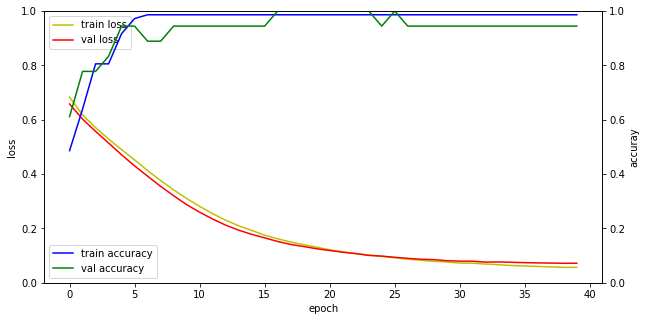

In [18]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 1.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')   # 훈련 정확도
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.03400721400976181 /정확도: 100.0 %


In [35]:
# model.save('Country3.h5')

In [36]:
model = load_model('Country3.h5')

In [23]:
# 1) 주당 음주 횟수: 0 ~ 3(3회 이상)
# 2) 농촌에서 생활적이 있다: 0(없음), 1(있음)
# 3) 가족중에 농촌에서 생활하고 있는 친척있는 여부: 0(없음), 1(있음)
# 4) 1년동안의 여행 횟수: 0 ~ 12
#     (12이상, 교통을 이용한 등산/캠핑, 당일, 국내, 국외 모두 해당)
# 5) 집을 소유 할 수 있는 경제력: 0(없음), 1(있음)
# 6) 경작 할 수 있는 토지 평수: 0 ~ (평)
#     0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상
# 7) 정착: 1, 실패: 0
        
drink = int(input('주당 음주 횟수는 (0 ~ 3(3회 이상)):'))
life = int(input('농촌에서 생활한 경험(0(없음), 1(있음)):'))
life2 = int(input('가족중에 농촌에서 생활하고 있는 친척있는 여부(0(없음), 1(있음)):'))
trip = int(input('1년동안의 여행 횟수(0 ~ 12):'))
house = int(input('집을 소유 할 수 있는 경제력(0(없음), 1(있음)):'))
land = int(input('경작 할 수 있는 토지 평수(0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상):'))

#### 표준화를 하여 학습한 경우 모델 이용시에도 표준화를 해서 이용해야함. ★

In [24]:
# 모집단의 평균과 표준편차를 이용하여 테스트 데이터의 표준화 진행 ★
data = []
data.append((drink - ms[0]) / stds[0])
data.append((life - ms[1]) / stds[1])
data.append((life2 - ms[2]) / stds[2])
data.append((trip - ms[3]) / stds[3])
data.append((house - ms[4]) / stds[4])
data.append((land - ms[5]) / stds[5])

x = np.array([
             data,
      ])
print(x.shape)
print(x)

(1, 6)
[[-0.77702869  1.25064086  0.71774056 -2.57554955 -3.39116499 -0.96083417]]


In [25]:
yp = model.predict(x)
print(yp)
print(yp.shape)

for i in range(len(x)):
    # print('적응 확률:', yp[i][0] * 100, ' %')
    print('적응 확률: {0:.3f}%'.format(yp[i][0] * 100))
    
    if yp[i][0] >= 0.5:    # 기존 사례를 참고하여 결정
        print('시골형: 시골에 적응 할 수 있습니다.')
    else:
        print('도시형: 시골에 적응이 불가능합니다.')


[[0.00102597]]
(1, 1)
적응 확률: 0.103%
도시형: 시골에 적응이 불가능합니다.


In [27]:
# 모든 데이터를 통으로 입력받은 경우
# 2,1,1,0,3,1,0
# 2,1,1,1,3,1,0
# 2,1,1,1,3,1,1
# 2,1,1,1,6,1,1
total = input('모든 데이터를 통으로 입력:')
total_split = np.array(total.split(','), dtype=float)
data = []
data.append((total_split[0] - ms[0]) / stds[0])
data.append((total_split[1] - ms[1]) / stds[1])
data.append((total_split[2] - ms[2]) / stds[2])
data.append((total_split[3] - ms[3]) / stds[3])
data.append((total_split[4] - ms[4]) / stds[4])
data.append((total_split[5] - ms[5]) / stds[5])

x = np.array([
             data,
      ])

yp = model.predict(x)

for i in range(len(x)):
    # print('적응 확률:', yp[i][0] * 100, ' %')
    print('적응 확률: {0:.3f}%'.format(yp[i][0] * 100))
    
    if yp[i][0] >= 0.8:    # 기존 사례를 참고하여 결정
        print('귀농형: 시골에 적응 할 수 있습니다.')
    elif yp[i][0] >= 0.5:    # 기존 사례를 참고하여 결정
        print('귀촌형: 시골에 적응 할 수 있습니다.')
    else:
        print('도시형: 시골에 적응이 불가능합니다.')

적응 확률: 3.882%
도시형: 시골에 적응이 불가능합니다.
